# Topic of the course
In this practical course, you will first explore raw electrophysiology data, and then chose one out of these projects:

1. Write an algorithm to detect spikes on a single electrode channel
2. Explore the distribution of spike waveform shapes

# Introduction: What data will be used
You will use raw electrophysiology data acquired in the mouse brain using Neuropixels probes. A Neuropixels probe has typically 384 electrode channels, aligned vertically.

![Neuropixels probe](../neural_course/images/41586_2017_Article_BFnature24636_Fig1_HTML.jpg?raw=true)

Read the full caption in the [article](https://www.nature.com/articles/nature24636)

The raw data you will explore is the "action potential" band (AP) of what is acquired on the electrodes, i.e. the high-pass filtered voltage signal that contains mainly action potentials (or "spikes") of neural cells. This voltage signal is acquired at a sampling rate of 30'000 Hz. We will give you data snippets of 1 second long, and will display typically 50 millisecond within it, to see the spikes that last around 1 millisecond.

As it is interesting to see such signal unfolding over time across all the 384 electrode channels at once, we use a display of `time x electrode depth`, and a grey-color scale indicates the voltage value. The baseline voltage is grey, and any deflection from it will be colored either black or white. Note that across depth, the electrodes may cross different brain regions (see the colouring on the right-hand column).

On the example below, spikes are highlighted with dots (green or red). Some are selected with an arrow and circle to exemplify three distinct categories:
- in violet: spikes that are **not detected** by our algorithm
- in red: spikes that are detected, but classified as belonging to a **bad unit**
- in green: spikes that are detected, and classified as belonging to a **good unit**

![Reveal website example (PID 1e104b)](../neural_course/images/1e104bf4-7a24-4624-a5b2-c2c8289c0de7_2020-09-20_1_SWC_043_probe00_destripe_T0600__annotated.jpg?raw=true)

## Select one of the dataset available

Three datasets have been selected to run this course, however many more are available online shall you want to replicate this in your own time.

For this course, you can use either:

- Data in the cortex and caudoputamen ; PID `1a276285-8b0e-4cc9-9f0a-a3a002978724`, at 1500s in the recording
- Data in the hindbrain ; PID `5d570bf6-a4c6-4bf1-a14b-2c878c84ef0e`, at 1500s in the recording
- Data in the hypothalamus and cerebral nuclei ; PID `da8dfec1-d265-44e8-84ce-6ae9c109b8bd`, at 1500s in the recording

![3 PIDs available](../neural_course/images/3_pids.png?raw=true)

## Download the datasets

Use this [script](../neural_course/scripts/data_download.py) to download the dataset. Set the `LOCAL_DATA_PATH` to a folder on your machine where you want the data downloaded.

Note: This is currently using internal Alyx, not openalyx

# Step 1: Explore the data

## Preview using the websites

You can easily preview the data at three time snippet onto the 2 websites listed below, to give you a feel for what it may look like in the one snippet you will be analysing (note that your snippet will be taken at a slightly different time point than what's displayed on these webpages).


### The reveal website
Use the reveal website dedicated to displaying the raw data and the spike sorting output:
- [PID 1a276285](http://reveal.internationalbrainlab.org.s3-website-us-east-1.amazonaws.com/benchmarks.html#/0/3)
- [PID 5d570bf6](http://reveal.internationalbrainlab.org.s3-website-us-east-1.amazonaws.com/benchmarks.html#/2/3)
- [PID da8dfec1](http://reveal.internationalbrainlab.org.s3-website-us-east-1.amazonaws.com/benchmarks.html#/7/3)

![Reveal website example (PID 1e104b)](../neural_course/images/1e104bf4-7a24-4624-a5b2-c2c8289c0de7_2020-09-20_1_SWC_043_probe00_destripe_T0600.jpg?raw=true)

### The visualisation website
Use the visualisation website to see not only the raw data and spike sorting output, but also many other electrophysiological features from the same recording.
- [PID 1a276285](https://viz.internationalbrainlab.org/app?dset=bwm&pid=1a276285-8b0e-4cc9-9f0a-a3a002978724&tid=0&cid=762&qc=0)
- [PID 5d570bf6](https://viz.internationalbrainlab.org/app?dset=bwm&pid=5d570bf6-a4c6-4bf1-a14b-2c878c84ef0e&tid=0&cid=555&qc=1)
- [PID da8dfec1](https://viz.internationalbrainlab.org/app?dset=bwm&pid=da8dfec1-d265-44e8-84ce-6ae9c109b8bd&tid=0&cid=687&qc=0)

![Visualisation website example (PID 1e104b)](../neural_course/images/1e104bf4-7a24-4624-a5b2-c2c8289c0de7_overview.png?raw=true)

## Explore in depth using the viewephys GUI

You will be using a graphical user interface (GUI) to explore the raw electrophysiology data. This is a program to install on your computer, in the python environment `coursenv`.

### Launch the GUI
Open your python interpreter. Make sure it is using the environment `coursenv`.

Run the lines in [this script](../neural_course/scripts/launch_viewephys.py) to launch the viewephys GUI.

- The default data will be PID `5d570bf6-a4c6-4bf1-a14b-2c878c84ef0e`, at 1500s in the recording. You can change this at the top of the script.

### Use the GUI
The first view will be a gray background with purple dots overlaid. The gray background is the voltage trace captured on each channel of the Neuropixels electrode (x-axis: time, y-axis: channels). At first, the whole 1 second data snippet is shown. You need to zoom in to see spikes, which last on the order of 1 millisecond.

To zoom in, hold the button `control`, click in the middle of the GUI window and drag laterally towards the right using your mouse.
Once you can see spikes more clearly, you can click on the purple dot overlaid. You should see a pop-up window appearing, showing you different aspects of the spike selected.

View the voltage on a single channel by using the widget tool. Activate it by right-clicking on the GUI window, and selecting "View Trace".

![Reveal website example (Viewephys GUI with missing spike and trace widget)](../neural_course/images/missing_spike.png?raw=true)

The `x` and `t` values in the left-bottom corner show you respectively the channel index, and the time (in millisecond) within the data snippet where your mouse cursor is. This will be useful to you if searching for a channel / time point with missing spikes (Project 1).

# Step 2: Select a project

## Project 1: Write an algorithm to detect spikes on a single electrode channel

In this project, you will:
- Explore the raw data using the viewephys GUI to find missing spikes
- Identify a single channel where you believe a spike of large amplitude is missing
- Create a variable that contains just that channel data, and plot it
- Write an algorithm to detect the identified spike, based on a single threshold crossing
- Plot where you detected spikes, and plot the voltage trace for the spike(s) you detected using your method

Questions to answer:
- What happens if you change the threshold value? What would be a good way to set that threshold value?
- What are the issues encountered with this algorithm? Can you think of a more sophisticated one that would solve these issues?

### Identify a missing spike

Using the viewephys GUI as explained in Step 1, identify a channel and time where there is a missing spike, i.e. a clear deflection in the voltage traces, but that has no purple dot overlaid. Place your mouse over where you think the missing spike is, then take a screenshot of the GUI window, for later reference. You will reuse the `x` and the time axis values from this GUI window in the analysis.

Note: If you do not manage to use the GUI, simply select an arbitrary channel number and time point (you can re-use the one selected as part of the example below).

### Loading and visualising the data

Use the `LoadData` class to get the necessary dataset. Here we show you how to load the default dataset, but please change the variables to your local data path and the PID of your choice.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from iblcourse.sources.neural_course.scripts.viewephys_model import LoadData

LOCAL_DATA_PATH = Path('/Users/gaelle/Documents/Work/EphysAtlas/Data')
pid = '5d570bf6-a4c6-4bf1-a14b-2c878c84ef0e'
time0 = 1500

data = LoadData(LOCAL_DATA_PATH, pid, time0)

/Users/gaelle/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))


The raw data is contained in the matrix `data.ap` of shape N channels x N samples, which is respectively equal to 384 (for a Neuropixels probe) and 30000 (as we selected 1 second of data, and our sampling frequency is 30000Hz).

In [70]:
print(data.ap.shape)

(384, 30000)


You will have to select one channel from it, i.e. an entire row of the matrix. To do so, use `:` :

In [71]:
indx_row = 274  # Note that indices start from 0, not 1

single_row = data.ap[indx_row, :]
print(single_row.shape)

(30000,)


To develop your algorithm and quickly visualise the result, you can plot data during a smaller time window:

In [72]:
time_plot = np.array([475., 490.])  # start and end ; in millisecond

# We need to convert the millisecond values into integer increments to index our matrix
# For this, we use the sampling frequency, and divide by 1000 to pass from millisecond to second
index_plot = (time_plot * data.fs_ap / 1000).astype('int')

# Take the data between these indices
single_row_window = single_row[index_plot[0]:index_plot[1]]

# Recompute the time at which we start plotting (needed as we did a conversion to integers, which is equivalent to rounding)
t_actual = index_plot * 1000 / data.fs_ap  # in milliseconds
# Compute a time vector for plotting, of the same size as our matrix
t_vector = np.linspace(t_actual[0], t_actual[1], num=len(single_row_window))

We can now plot the data during this time window. For this, you will create a matplotlib figure:

Text(0, 0.5, 'Voltage (V)')

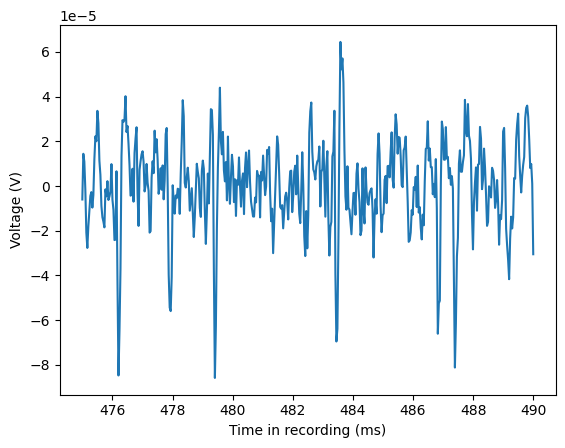

In [73]:
plt.plot(t_vector, single_row_window)
plt.xlabel('Time in recording (ms)')
plt.ylabel('Voltage (V)')

### Create an algorithm to detect spikes

We will show you a simple single-threshold method to detect spikes. Once this is mastered, feel free to experiment with different threshold values, different data, or even write a new algorithm.

First, use the shortened data to develop your algorithm and plot quickly the result.

The single-threshold algorithm is based on the observation that spikes are of large amplitude, and go downwards (i.e. the voltage is negative). To show you this, we will draw a line at 40 micro Volt = 4 * 10 to the power -6 Volt.

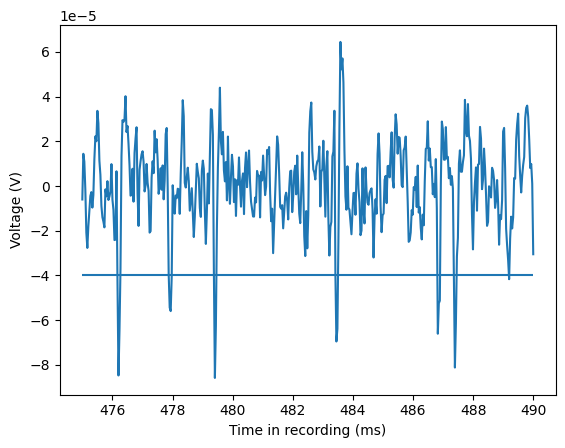

In [74]:
threshold = -40 * 1e-6  # Volt ; Notice the nomenclature "e" for 10 power...

plt.plot(t_vector, single_row_window)
plt.xlabel('Time in recording (ms)')
plt.ylabel('Voltage (V)')

plt.hlines(threshold, t_vector[0], t_vector[-1])  # Notice the use of -1 to access the last value

To detect these downward spikes, we will search for the moment at which the voltage trace crosses the threshold. We will use the following approach:
- we will search for the increment in the matrix where the value is above the threshold or equal to it, and the next increment value is below the threshold. We will use the `numpy where` function for this
- we will create two vectors: one that is the matrix removing its last value, and one that is the matrix removing the first value. This is effectively to have two vectors of the same length, but for the same increment within it the two vectors will return the values at the index, and at the index+1 respectively.

In [75]:
vector1 = single_row_window[0:-2]
vector2 = single_row_window[1:-1]

# We show here that the sizes are similar
print(f'Size of vector1: {len(vector1)}, vector2: {len(vector2)}')

# We show here the values in comparison with those contained in single_row_window:
index_show = 23
print(f'Value at index {index_show} for vector1: {vector1[index_show]}, vector2: {vector2[index_show]}, \n'
      f'Value at index {index_show} for single_row_window: {single_row_window[index_show]}, at index {index_show+1}: {single_row_window[index_show+1]}')

Size of vector1: 448, vector2: 448
Value at index 23 for vector1: -1.5261496173479827e-06, vector2: -4.644130967790261e-06, 
Value at index 23 for single_row_window: -1.5261496173479827e-06, at index 24: -4.644130967790261e-06


We use the `where` function from numpy to get the index where the voltage trace change values:

In [76]:
index_cross = np.where((vector1 >= threshold) & (vector2 < threshold))[0]
print(index_cross)
print(f'We have detected {len(index_cross)} spikes')

[ 34  86 131 252 353 370 424]
We have detected 7 spikes


We now plot these indices (converted back to time) on top of the trace:

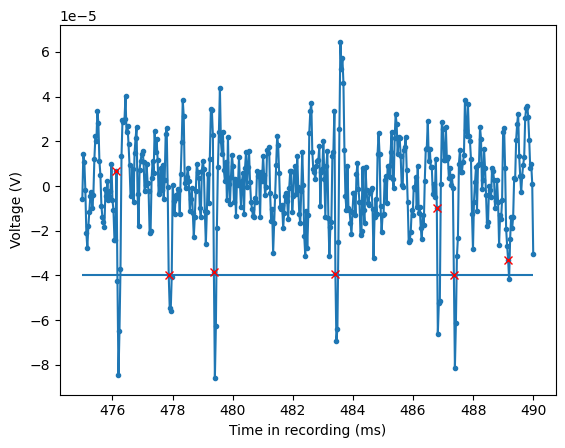

In [77]:
plt.plot(t_vector, single_row_window, '.-')  # We plot with dots . to show the data samples
plt.xlabel('Time in recording (ms)')
plt.ylabel('Voltage (V)')

plt.hlines(threshold, t_vector[0], t_vector[-1])  # Notice the use of -1 to access the last value

plt.plot(t_vector[index_cross], single_row_window[index_cross], 'xr')

### Further exercices

#### Plot spike waveforms
Now that you have detected spikes, can you plot their spike waveform?

For this, you need to define a time window around the detection time, and take the corresponding values from within your voltage trace.

#### Change the threshold
How many spikes do you detect if you lower the treshold to -2 micro Volt? Are these real spikes, or are some noise?

#### Plotting your detected spike times into the viewephys GUI
Run the detection algorithm on the whole single-channel trace (30000 samples long), and get back the `index_cross`.
You can upload them into the viewephys GUI using this command:

```
# Instantiate viewephys
ae = ViewSpikeModel(LOCAL_DATA_PATH, pid, time0)
# Plotting the main GUI window
ae.view()
# Add your spikes
ae.plot_index(index_cross, channel=indx_row)
```

Note:  the dots will be red, you will not be able to click on them to see the waveforms as you can do for the purple spikes.

Do the spikes you detected overlay well with those in pink ? How would you compare using Python?

## Project 2: Explore the waveform shapes

### Load the data
First, let's load the data as shown for Project 1, but this time we want to see how many spikes there are.

In [78]:
# Load the data
data = LoadData(LOCAL_DATA_PATH, pid, time0)

/Users/gaelle/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/regions.py:439: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/gaelle/anaconda3/envs/iblenv/lib/python3.10/site-packages/ibllib/atlas/regions.py:441: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))


The data contains a `spikes` dataframe, that is size N spikes x N columns, with the following column names:

In [79]:
print(data.spikes.shape)
print(data.spikes.columns)

(60002, 8)
Index(['index', 'sample', 'trace', 'x', 'y', 'z', 'alpha', 'acronym'], dtype='object')


To get the brain region acronym for a spike, use the `acronym` column:

In [80]:
i_spike = 2
region = data.spikes.acronym.loc[i_spike]

print(region)

scp


The `trace` column contains the channel number of the spike:

In [81]:
ch_ind = int(data.spikes['trace'].loc[2])
print(ch_ind)

307


The actual waveforms traces are contained in `waveforms`, of shape N spikes x N samples X N channels:

In [82]:
print(data.waveforms.shape)

(60002, 121, 40)


Note: The waveforms are not in Volt, but in standardised unit.

### Run an algorithm that computes the waveform features and explore them

Run the function `compute_spike_features` onto the waveforms to obtain a dataframe of waveform features:

In [83]:
from neurodsp.waveforms import compute_spike_features
df = compute_spike_features(data.waveforms)

This dataframe has the following columns:

In [84]:
print(df.columns)

Index(['peak_trace_idx', 'peak_time_idx', 'peak_val', 'invert_sign_peak',
       'trough_time_idx', 'trough_val', 'peak_to_trough_ratio',
       'peak_to_trough_ratio_log', 'tip_time_idx', 'tip_val',
       'peak_to_trough_duration', 'half_peak_post_time_idx',
       'half_peak_pre_time_idx', 'half_peak_post_val', 'half_peak_pre_val',
       'half_peak_duration', 'recovery_time_idx', 'recovery_val',
       'depolarisation_slope', 'repolarisation_slope', 'recovery_slope'],
      dtype='object')


We add back in the brain acronym information from the spikes:

In [85]:
df['acronym'] = data.spikes.acronym

To explore the different distributions, let's first chose one feature to explore (i.e. column of the dataframe - here the peak voltage value), and display the distribution per brain region.
We will use pandas `groupby` to regroup the feature per brain region.
We will use the Kernel Density Estimate plot type, to show the distribution curve. Note that the sum of this distribution is 1, which means we look at the data in a normalised way.

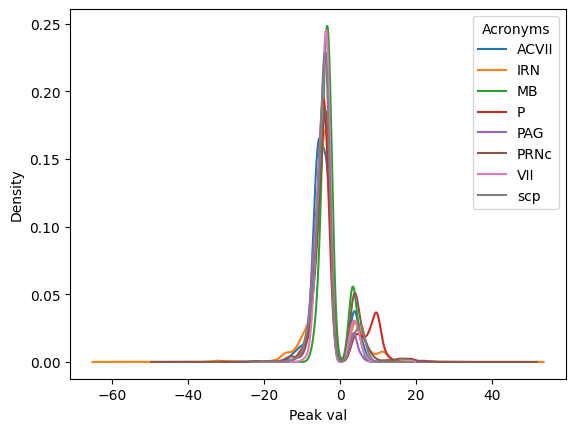

In [86]:
df.groupby('acronym')['peak_val'].plot(kind='kde')  # KDE: kernel density estimate
# Add label on x-axis
plt.xlabel('Peak val')  # Pandas uses matplotlib under the hood to plot
# Add legends for the curves (acronyms)
plt.legend(df.groupby('acronym').acronym.dtype.index.to_list(), title='Acronyms')

Note:
- The distribution is largest in the negative values, indicating there is a larger proportion of negative spikes than positive.
- The distribution will be bimodal by default (positive and negative values), with a sharp drop at zero - this is because the peak value is computed as the maximal amplitude value of a spike
- Notice the red bump on the right: The region `P` seems to have (in proportion, remember the distribution is normalised) more large-amplitude positive spikes compared to other brain regions

You can also visualise the distribution using box plot. This gives an overall view of the values in a distribution - you can here notice that large amplitude positive spikes are not only found in `P` but also `PRNc`.

peak_val    Axes(0.125,0.11;0.775x0.77)
dtype: object

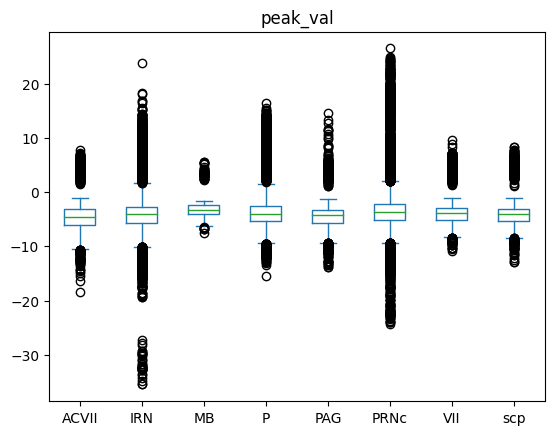

In [87]:
df.plot.box(column="peak_val", by="acronym")

To explore the extreme cases, we will create a smaller dataframe containing only the spikes whose *absolute* peak value is above 20.

In [88]:
df_extreme = df.loc[np.abs(df['peak_val']) > 20]

The index of that new dataframe are the row numbers taken from the previous dataframe `df` (i.e. waveform index), which will be useful when wanting to plot waveforms.

In [89]:
df_extreme.index[0:9]  # Plot the index for the first 10 extreme waveforms

Index([202, 297, 416, 653, 895, 942, 1041, 1399, 1583], dtype='int64')

### View the waveform data
To visualise a given waveform you can call the dedicated viewephys GUI window:
```
# Instantiate viewephys
ae = ViewSpikeModel(LOCAL_DATA_PATH, pid, time0)

# Plotting just the pop-up window for a given spike
ae.view_spike(iw=1583)
```

Or use the function :

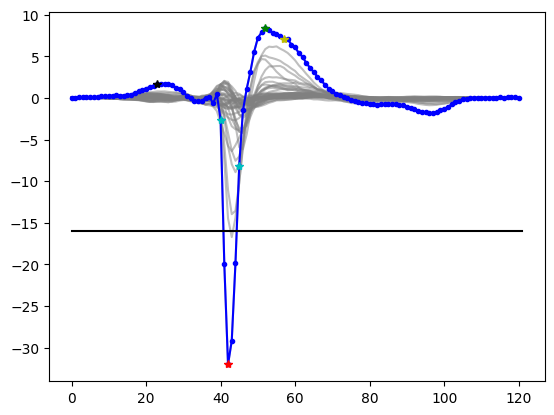

In [90]:
from neurodsp.waveforms import plot_peaktiptrough

iw=1583
fig, ax = plt.subplots(1, 1)
plot_peaktiptrough(df, data.waveforms, ax=ax, nth_wav=iw)

### Further exercices

#### Plot the largest waveforms (positive and negative)
Find the (two) waveforms with the biggest positive and negative peak values. Using the `plot_peaktiptrough` function, display the waveforms on 2 subplots side by side, and save the picture. Write each of their brain region acronym in the corresponding subplot title.

#### Explore the half-peak duration
The half-peak duration can be a marker for certain cell type, e.g. Parvalbumin-expressing neurons tends to have narrow waveforms. Let's have a look at the distributions.

Plot the KDE for the feature `half_peak_duration` for each brain region as shown above.
- Can you explain why the curves have this oscillatory shape (reminder: the sampling frequency is 30000 Hz)?
- Also, do you notice any difference between regions, e.g. for the region `MB`?